In [1]:
import pandas as pd

In [14]:
df= pd.read_csv("Student_Performance_Dataset.csv")
print(df.head())

  Student_ID  Age  Gender  Class  Study_Hours_Per_Day  Attendance_Percentage  \
0      S0001   15    Male     12                  1.0                     65   
1      S0002   19  Female      9                  1.6                     58   
2      S0003   14  Female     12                  3.6                     64   
3      S0004   18  Female      9                  5.5                     68   
4      S0005   14    Male     10                  5.0                     80   

  Parental_Education Internet_Access Extracurricular_Activities  Math_Score  \
0       Postgraduate              No                         No          40   
1           Graduate              No                        Yes          80   
2        High School             Yes                        Yes          83   
3       Postgraduate             Yes                         No          68   
4        High School             Yes                         No          41   

   Science_Score  English_Score  Previous_Ye

In [15]:
df.shape

(5000, 16)

In [16]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Class', 'Study_Hours_Per_Day',
       'Attendance_Percentage', 'Parental_Education', 'Internet_Access',
       'Extracurricular_Activities', 'Math_Score', 'Science_Score',
       'English_Score', 'Previous_Year_Score', 'Final_Percentage',
       'Performance_Level', 'Pass_Fail'],
      dtype='object')

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   Age                         5000 non-null   int64  
 2   Gender                      5000 non-null   object 
 3   Class                       5000 non-null   int64  
 4   Study_Hours_Per_Day         5000 non-null   float64
 5   Attendance_Percentage       5000 non-null   int64  
 6   Parental_Education          5000 non-null   object 
 7   Internet_Access             5000 non-null   object 
 8   Extracurricular_Activities  5000 non-null   object 
 9   Math_Score                  5000 non-null   int64  
 10  Science_Score               5000 non-null   int64  
 11  English_Score               5000 non-null   int64  
 12  Previous_Year_Score         5000 non-null   int64  
 13  Final_Percentage            5000 

In [18]:
print("La media de matemáticas es de "+str(df['Math_Score'].mean())) #convertimos a cadena las medias con str()
print("La media de Ingles es de "+str(df['English_Score'].mean()))
print("La media de Science es de "+str(df['Science_Score'].mean()))
print("La media de asistencia general es de "+str(df['Attendance_Percentage'].mean()))
print("La media de horas por dia de estudio  es de "+str(df['Study_Hours_Per_Day'].mean()))

La media de matemáticas es de 67.7548
La media de Ingles es de 67.7828
La media de Science es de 66.8954
La media de asistencia general es de 74.9198
La media de horas por dia de estudio  es de 3.28726


In [19]:
total_alumnos=df['Student_ID'].count()
total_repetidores=df['Pass_Fail'][df['Pass_Fail'] == 'Fail'].count()

Tasa_de_repetidores=(total_repetidores/total_alumnos)*100
Tasa_de_aprobacion=100-Tasa_de_repetidores

print("Este año  repetiran unos "+str(total_repetidores)+" alumnos. :( ")
print("Significa que tenemos una tasa de "+str(Tasa_de_aprobacion)+"% aprobados; y una tasa de "
+ str(Tasa_de_repetidores)+"% de reprobados")

Este año  repetiran unos 265 alumnos. :( 
Significa que tenemos una tasa de 94.7% aprobados; y una tasa de 5.3% de reprobados


In [20]:
print(df.isnull().sum())

Student_ID                    0
Age                           0
Gender                        0
Class                         0
Study_Hours_Per_Day           0
Attendance_Percentage         0
Parental_Education            0
Internet_Access               0
Extracurricular_Activities    0
Math_Score                    0
Science_Score                 0
English_Score                 0
Previous_Year_Score           0
Final_Percentage              0
Performance_Level             0
Pass_Fail                     0
dtype: int64


In [21]:
print(f"¿Hay duplicados?: {df['Student_ID'].duplicated().any()}")

¿Hay duplicados?: False


In [22]:
numero=df.select_dtypes(include=['number'])
numero.head()

,Age,Class,Study_Hours_Per_Day,Attendance_Percentage,Math_Score,Science_Score,English_Score,Previous_Year_Score,Final_Percentage
0,15,12,1.0,65,40,39,72,81,50.33
1,19,9,1.6,58,80,44,35,47,53.00
2,14,12,3.6,64,83,73,59,58,71.67
3,18,9,5.5,68,68,48,77,54,64.33
4,14,10,5.0,80,41,46,36,68,41.00


<Axes: >

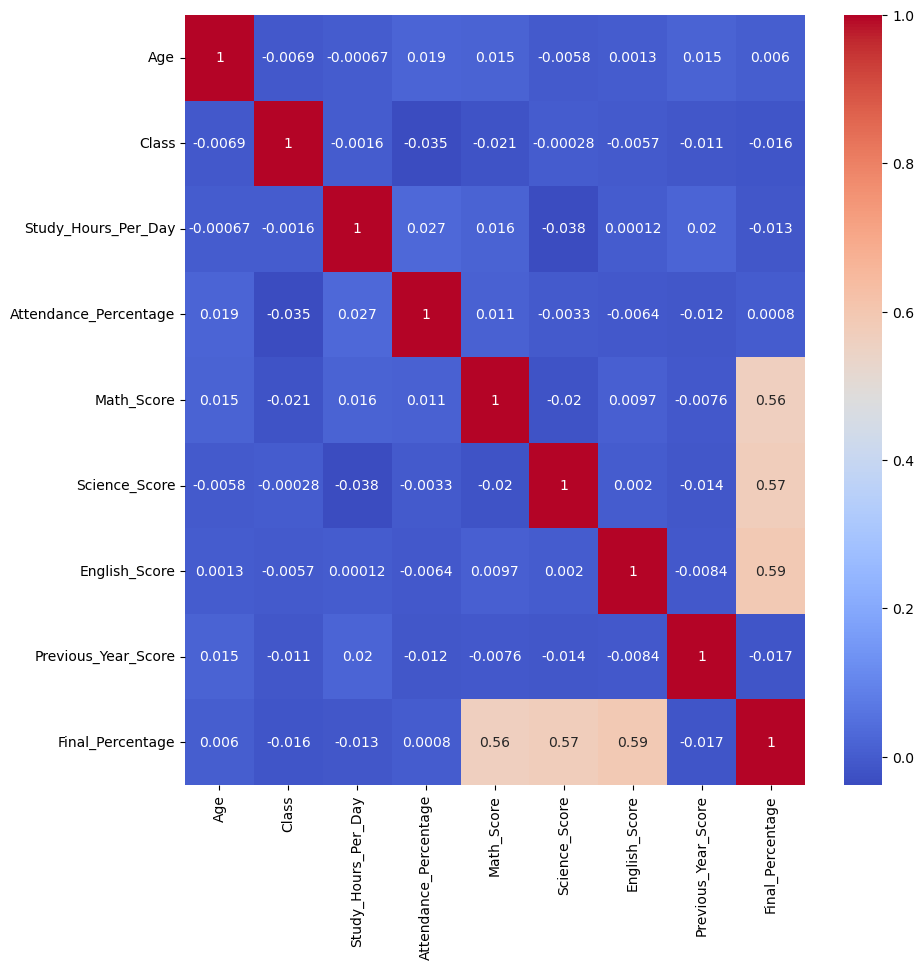

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

corre=numero.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corre, annot=True, cmap='coolwarm')


In [24]:
categorias=df.select_dtypes(exclude=['number'])

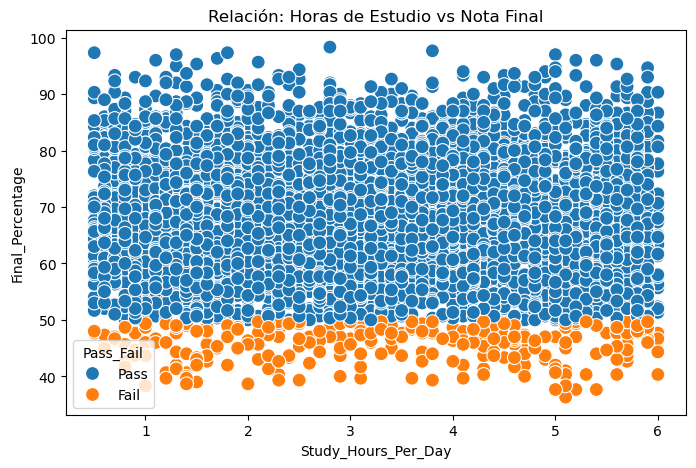

In [25]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Study_Hours_Per_Day', y='Final_Percentage', hue='Pass_Fail', s=100)
plt.title('Relación: Horas de Estudio vs Nota Final')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_12076\3879431923.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Internet_Access', y='Final_Percentage', palette="viridis")


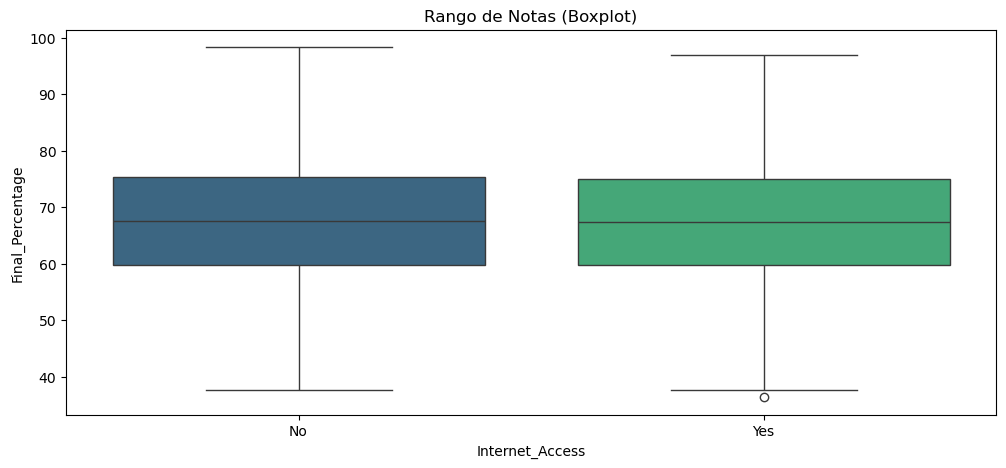

In [26]:
plt.figure(figsize=(12, 5))
# Este gráfico muestra dónde se concentra la mayoría de estudiantes
sns.boxplot(data=df, x='Internet_Access', y='Final_Percentage', palette="viridis")
plt.title('Rango de Notas (Boxplot)')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_12076\3262183123.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Performance_Level', y='Final_Percentage', order=orden_niveles, palette="Blues")


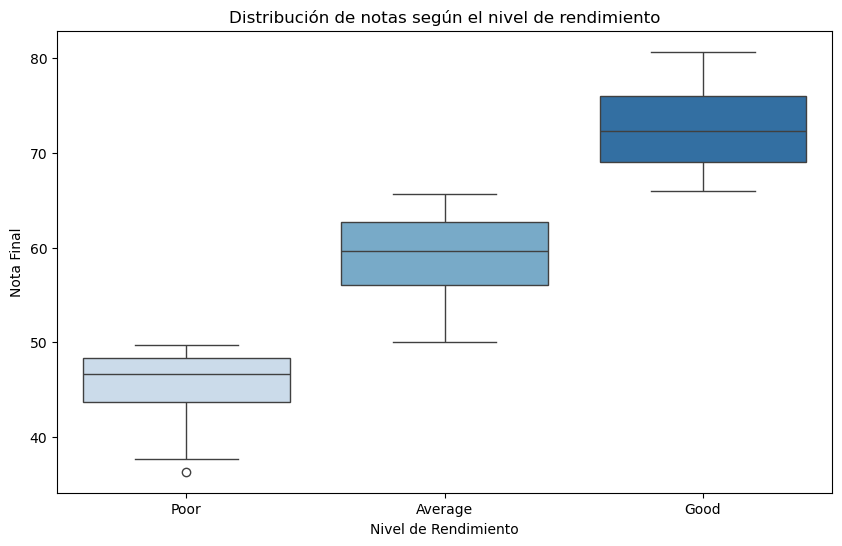

In [27]:
plt.figure(figsize=(10, 6))
# Definimos el orden para que el gráfico sea fácil de leer (de peor a mejor)
orden_niveles = ['Poor', 'Average', 'Good']
# Creamos el Boxplot
sns.boxplot(data=df, x='Performance_Level', y='Final_Percentage', order=orden_niveles, palette="Blues")

plt.title('Distribución de notas según el nivel de rendimiento')
plt.xlabel('Nivel de Rendimiento')
plt.ylabel('Nota Final')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_12076\1431279987.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Extracurricular_Activities', y='Final_Percentage', palette="viridis")


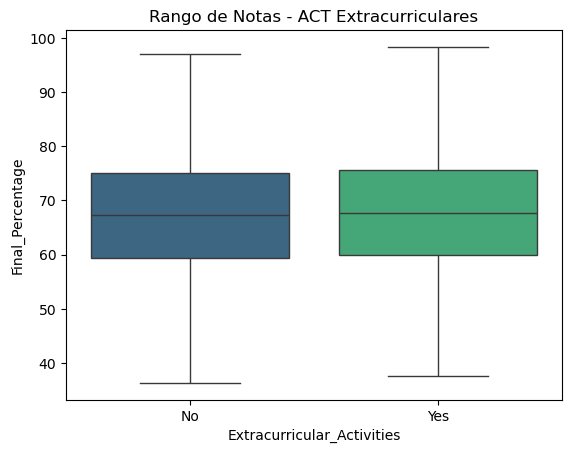

In [28]:
sns.boxplot(data=df, x='Extracurricular_Activities', y='Final_Percentage', palette="viridis")
plt.title('Rango de Notas - ACT Extracurriculares')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_12076\2476957722.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Parental_Education', y='Final_Percentage', palette="viridis")


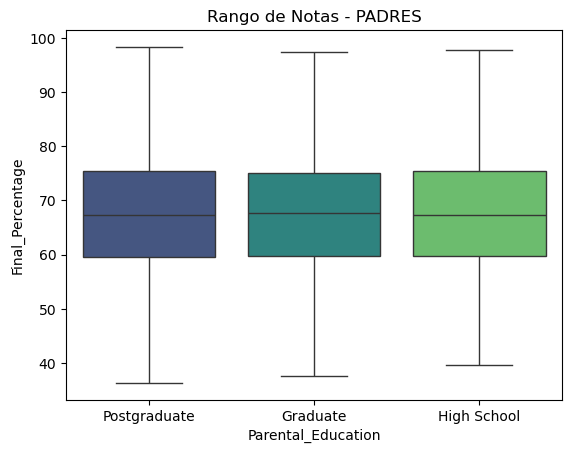

In [29]:
sns.boxplot(data=df, x='Parental_Education', y='Final_Percentage', palette="viridis")
plt.title('Rango de Notas - PADRES')
plt.show()

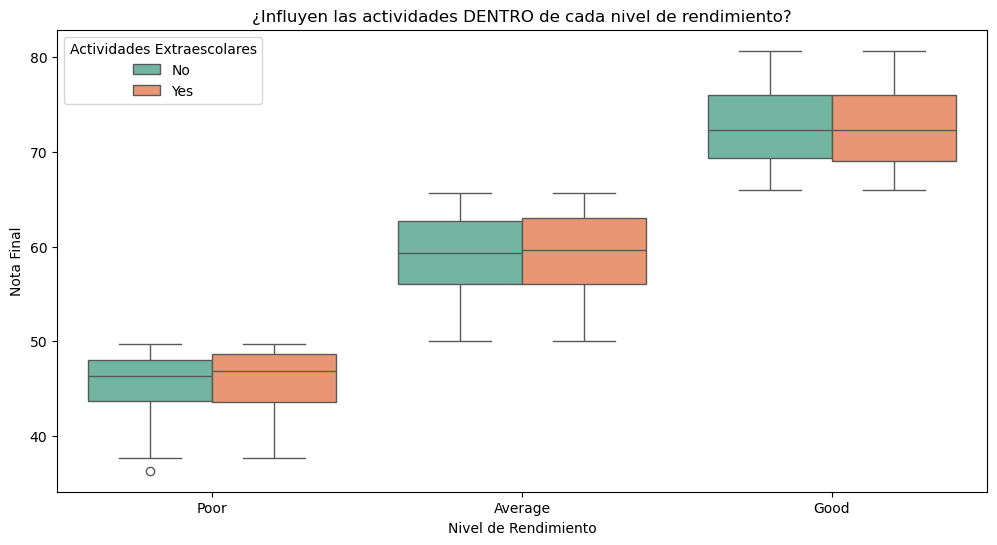

In [30]:
plt.figure(figsize=(12, 6))

# Usamos 'hue' para añadir la tercera segmetación o filtro (me añade una leyenda)
# order=['Poor', 'Average', 'Good'] asegura que la escalera se vea bien
sns.boxplot(data=df,
            x='Performance_Level',
            y='Final_Percentage',
            hue='Extracurricular_Activities',
            order=['Poor', 'Average', 'Good'],
            palette="Set2")

plt.title('¿Influyen las actividades DENTRO de cada nivel de rendimiento?')
plt.xlabel('Nivel de Rendimiento')
plt.ylabel('Nota Final')
plt.legend(title='Actividades Extraescolares')
plt.show()

In [31]:
y = df['Final_Percentage']
X = df.drop(['Final_Percentage', 'Student_ID', 'Pass_Fail', 'Performance_Level'], axis=1)
X = pd.get_dummies(X, drop_first=True)
print("Así quedan los datos para el modelo (solo números):")
print(X.head())

Así quedan los datos para el modelo (solo números):
   Age  Class  Study_Hours_Per_Day  Attendance_Percentage  Math_Score  \
0   15     12                  1.0                     65          40   
1   19      9                  1.6                     58          80   
2   14     12                  3.6                     64          83   
3   18      9                  5.5                     68          68   
4   14     10                  5.0                     80          41   

   Science_Score  English_Score  Previous_Year_Score  Gender_Male  \
0             39             72                   81         True   
1             44             35                   47        False   
2             73             59                   58        False   
3             48             77                   54        False   
4             46             36                   68         True   

   Parental_Education_High School  Parental_Education_Postgraduate  \
0                       

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Entrenaremos con {len(X_train)} alumnos y probaremos con {len(X_test)} alumnos.")
modelo = LinearRegression()
modelo.fit(X_train, y_train)

Entrenaremos con 4000 alumnos y probaremos con 1000 alumnos.


LinearRegression()

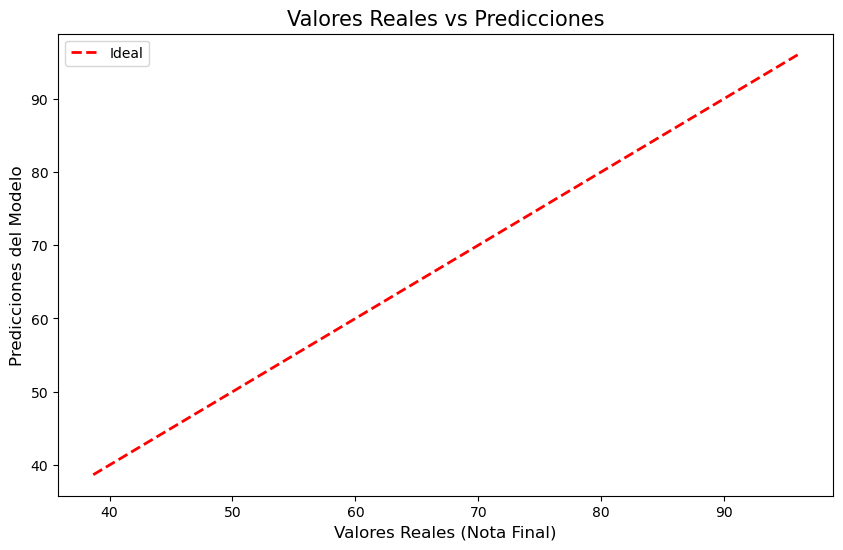

------------------------------------------------
Precisión del modelo (R2 Score): 1.00
Error medio absoluto: 0.00
------------------------------------------------


In [33]:
predicciones = modelo.predict(X_test)
score = r2_score(y_test, predicciones)
error = mean_absolute_error(y_test, predicciones)

plt.figure(figsize=(10, 6))

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--', label='Ideal')

plt.title('Valores Reales vs Predicciones', fontsize=15)
plt.xlabel('Valores Reales (Nota Final)', fontsize=12)
plt.ylabel('Predicciones del Modelo', fontsize=12)
plt.legend()

plt.show()

print("------------------------------------------------")
print(f"Precisión del modelo (R2 Score): {score:.2f}")
print(f"Error medio absoluto: {error:.2f}")
print("------------------------------------------------")


In [39]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [40]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [41]:
from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("R2 Score:", r2)


Train MSE: 7.435373100483585e-06
Test MSE: 7.473873846254123e-06
R2 Score: 0.9999999371025602


In [43]:
r2 = r2_score(y_test,y_test_pred)
